In [1]:
from src.forecastingToolkit import *
import matplotlib.pyplot as plt
from stationarity_toolkit.stationarity_toolkit import StationarityToolkit
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

In [2]:
state = "CA"

In [3]:
property_data = prepare_property_data("CA")
property_data

,PropertyName,Address,City,State,ZipCode,PhoneNumber,TotalSqFt,NetRentableSqFt,TotalAcres,NumBuildings,...,PropertyStatus,ImpressionRating,LocationRating,CompletionDate,Week,Year,Month,quarter,year_quarter,year_month
268,360 Storage Center,6649 Central Avenue,Newark,CA,94560.0,9.258924e+09,135884.0,101913.0,1.96,1.0,...,Completed,A,B-,2016-06-01,22.0,2016.0,6.0,2.0,2016-4.0-01,2016-06-30
269,CubeSmart Self Storage,1320 Lemon Street,Vallejo,CA,94590.0,7.075523e+09,93000.0,88350.0,4.44,7.0,...,Completed,C,B-,1977-01-01,53.0,1977.0,1.0,1.0,1977-1.0-01,1977-01-31
270,5A Rent - A - Space,455 Moraga Road,Moraga,CA,94556.0,9.256432e+09,101489.0,86265.0,4.14,7.0,...,Completed,B,B+,2000-01-01,52.0,2000.0,1.0,1.0,2000-1.0-01,2000-01-31
271,780 Mini Storage,1855 Benicia Road,Vallejo,CA,94591.0,7.075523e+09,26190.0,24880.0,1.57,5.0,...,Completed,C,A+,1987-01-01,1.0,1987.0,1.0,1.0,1987-1.0-01,1987-01-31
272,A - 1 Armor Self Storage,2468 Whipple Road,Hayward,CA,94544.0,5.104893e+09,31000.0,26350.0,2.48,2.0,...,Completed,B,B,1983-01-01,52.0,1983.0,1.0,1.0,1983-1.0-01,1983-01-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28023,StorQuest Self Storage,3005 Ramco Street,West Sacramento,CA,95691.0,9.164685e+09,54513.0,51787.0,2.54,1.0,...,Completed,B,B,2020-07-20,30.0,2020.0,7.0,3.0,2020-7.0-01,2020-07-31
28230,Patterson Plus Self Storage,5325 Calle Real,Santa Barbara,CA,93111.0,8.059644e+09,71742.0,60980.0,2.45,2.0,...,Completed,A,B-,2004-01-01,1.0,2004.0,1.0,1.0,2004-1.0-01,2004-01-31
28233,Pink Door Storage,1351 Fulkerth Road,Turlock,CA,95380.0,2.092272e+09,129472.0,122998.0,13.44,3.0,...,Completed,A,B-,2020-08-03,32.0,2020.0,8.0,3.0,2020-7.0-01,2020-08-31
28408,Lincoln Ranch Self Storage,1051 Joiner Pkwy,Lincoln,CA,95648.0,9.166331e+09,83456.0,79283.0,11.90,11.0,...,Completed,B,B,2020-10-26,44.0,2020.0,10.0,4.0,2020-10.0-01,2020-10-31


### Remove Outliers based on EDA Done Earlier

In [4]:
property_data = remove_outliers(property_data, "NetRentableSqFt")
property_data = remove_outliers(property_data, "NumBuildings")
property_data = remove_outliers(property_data, "NumFloors")
property_data.head()

,PropertyName,Address,City,State,ZipCode,PhoneNumber,TotalSqFt,NetRentableSqFt,TotalAcres,NumBuildings,...,PropertyStatus,ImpressionRating,LocationRating,CompletionDate,Week,Year,Month,quarter,year_quarter,year_month
268,360 Storage Center,6649 Central Avenue,Newark,CA,94560.0,9.258924e+09,135884.0,101913.0,1.96,1.0,...,Completed,A,B-,2016-06-01,22.0,2016.0,6.0,2.0,2016-4.0-01,2016-06-30
269,CubeSmart Self Storage,1320 Lemon Street,Vallejo,CA,94590.0,7.075523e+09,93000.0,88350.0,4.44,7.0,...,Completed,C,B-,1977-01-01,53.0,1977.0,1.0,1.0,1977-1.0-01,1977-01-31
270,5A Rent - A - Space,455 Moraga Road,Moraga,CA,94556.0,9.256432e+09,101489.0,86265.0,4.14,7.0,...,Completed,B,B+,2000-01-01,52.0,2000.0,1.0,1.0,2000-1.0-01,2000-01-31
271,780 Mini Storage,1855 Benicia Road,Vallejo,CA,94591.0,7.075523e+09,26190.0,24880.0,1.57,5.0,...,Completed,C,A+,1987-01-01,1.0,1987.0,1.0,1.0,1987-1.0-01,1987-01-31
272,A - 1 Armor Self Storage,2468 Whipple Road,Hayward,CA,94544.0,5.104893e+09,31000.0,26350.0,2.48,2.0,...,Completed,B,B,1983-01-01,52.0,1983.0,1.0,1.0,1983-1.0-01,1983-01-31


### Create dataframe for rentable sqft added every month 

In [5]:
rentable_sqft_added_ts = get_rentable_sqft_by_month(property_data)
rentable_sqft_added_ts.head()

year_month
1971-01-31    147139.0
1971-02-28         0.0
1971-03-31         0.0
1971-04-30         0.0
1971-05-31         0.0
Name: NetRentableSqFt, dtype: float64

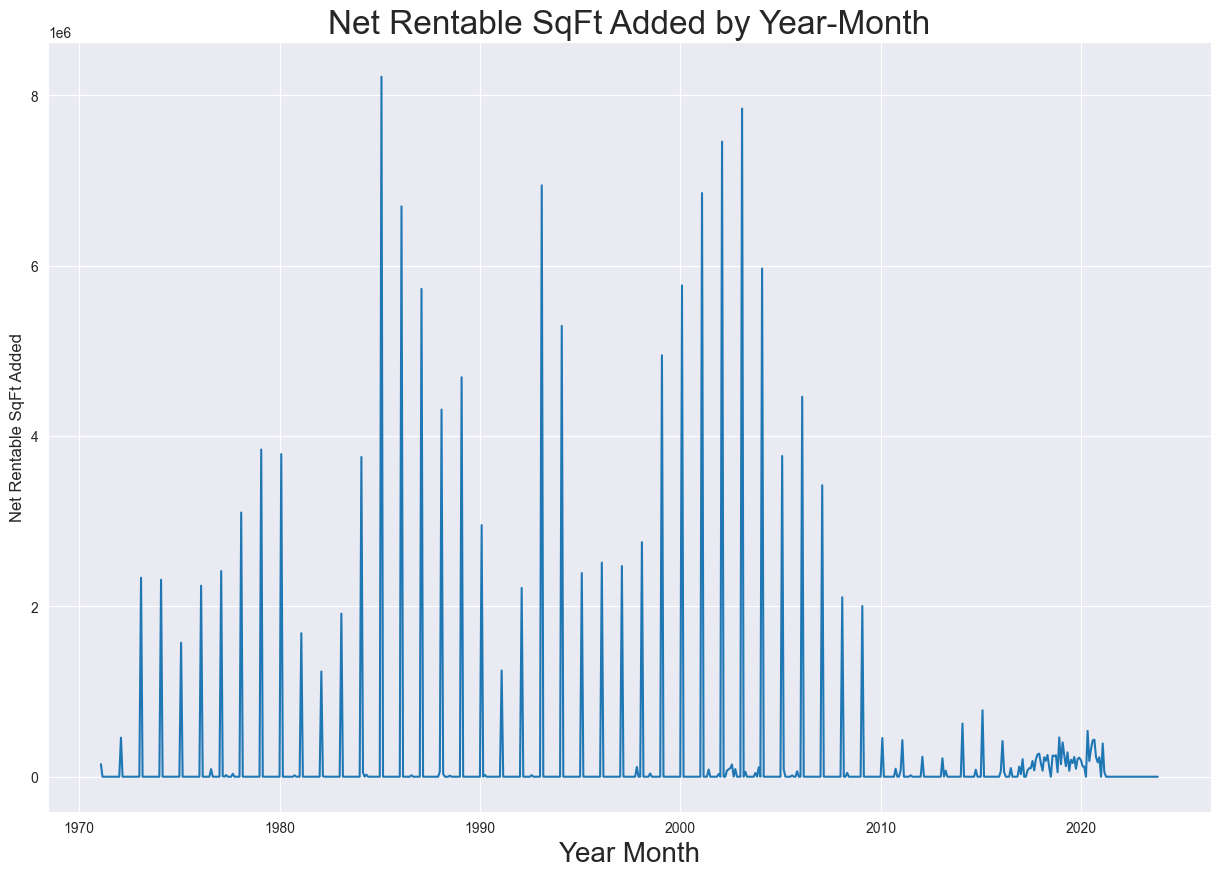

In [6]:
plt.figure(figsize=(15, 10))
plt.plot(rentable_sqft_added_ts.index, rentable_sqft_added_ts.values, linestyle='-')
plt.grid(True)
plt.xlabel('Year Month', fontsize=20)
plt.ylabel('Net Rentable SqFt Added', fontsize=12)
plt.title('Net Rentable SqFt Added by Year-Month', fontsize=24)
plt.show()

### Test Variance and Trend non-stationarity And create stationary time-series
Documentation here - https://pypi.org/project/stationarityToolkit/

In [7]:
st = StationarityToolkit(alpha=0.05)

In [8]:
transformed_rentable_sqft = st.remove_nonstationarity(rentable_sqft_added_ts)
transformed_rentable_sqft

/Users/bsmalla/PycharmProjects/publicStorageProject/venv/lib/python3.9/site-packages/arch/unitroot/unitroot.py:1134: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sigma = resols.bse[0]
/Users/bsmalla/PycharmProjects/publicStorageProject/venv/lib/python3.9/site-packages/arch/unitroot/unitroot.py:1142: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rho = resols.params[0]
/Users/bsmalla/PycharmProjects/publicStorageProject/venv/lib/python3.9/site-packages/stationarity_toolkit/stationarity_toolkit.py:261: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actua

,original,var_transformed,var_transformation_name,var_transformation_par,var_inverse_function,trend_transformed,trend_transformation_name,trend_initial_value,seasonal_initial_values,trend_inverse_function
year_month,,,,,,,,,,
1971-01-31,147139.0,147139.0,None,None,None,NaN,seasonal_trend,-147139.0,"[147139.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",<function StationarityToolkit.remove_trend_non...
1971-02-28,0.0,0.0,None,None,None,NaN,seasonal_trend,-147139.0,"[147139.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",<function StationarityToolkit.remove_trend_non...
1971-03-31,0.0,0.0,None,None,None,NaN,seasonal_trend,-147139.0,"[147139.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",<function StationarityToolkit.remove_trend_non...
1971-04-30,0.0,0.0,None,None,None,NaN,seasonal_trend,-147139.0,"[147139.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",<function StationarityToolkit.remove_trend_non...
1971-05-31,0.0,0.0,None,None,None,NaN,seasonal_trend,-147139.0,"[147139.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",<function StationarityToolkit.remove_trend_non...
...,...,...,...,...,...,...,...,...,...,...
2023-06-30,0.0,0.0,None,None,None,144408.0,seasonal_trend,-147139.0,"[147139.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",<function StationarityToolkit.remove_trend_non...
2023-07-31,0.0,0.0,None,None,None,134770.0,seasonal_trend,-147139.0,"[147139.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",<function StationarityToolkit.remove_trend_non...
2023-08-31,0.0,0.0,None,None,None,-161195.0,seasonal_trend,-147139.0,"[147139.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",<function StationarityToolkit.remove_trend_non...


### The StationarityToolkit returns a series where variance and trend are stable and stationary; it performed seasonal differencing and then trend differencing. However, we can notice enoromous amount of variance although it's found to be stationary.

### Now lets train on just the time series using Triple Exponential Smoothening Model with cross_valition using rmse scores

In [9]:
from sklearn.metrics import mean_squared_error

def get_mape(y_true, y_pred):
    """
    Calculate the Mean Absolute Percentage Error (MAPE).

    Parameters:
        - y_true: Array-like, true values.
        - y_pred: Array-like, predicted values.

    Returns:
        - MAPE: Mean Absolute Percentage Error.
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


# Function to perform time series cross-validation
def time_series_cross_validation(model, time_series, n_splits):
    # Determine the fold size
    fold_size = len(time_series) // n_splits

    # Initialize a list to store RMSE values
    rmse_values = []
    # mape_values = []
    # Perform cross-validation
    for i in range(1, n_splits):
        start_idx = time_series.index[i * fold_size]
        end_idx = time_series.index[(i + 1) * fold_size]

        # Split the data into train and test sets using datetime-based indexing
        train_data = time_series.loc[time_series.index < start_idx]
        test_data = time_series.loc[(time_series.index >= start_idx) & (time_series.index < end_idx)]


        # Train the model on the training data
        if len(train_data) > 0:
            # Train the model on the training data
            results = model.fit(train_data)
        else:
            print(f"Train data is empty for fold {i}. Check your data or cross-validation setup.")
            continue

        # Make predictions on the test data
        predicted_values = results.forecast(steps=len(test_data))
        # Calculate RMSE for this fold
        rmse = np.sqrt(mean_squared_error(test_data, predicted_values))
        # mape = get_mape(test_data, predicted_values)
        
        rmse_values.append(rmse)
        # mape_values.append(mape)
    return rmse_values

In [10]:
# Define model
timeseries = transformed_rentable_sqft["trend_transformed"].dropna()
model = ETSModel(timeseries, seasonal_periods=12, trend="add", seasonal="add",
         initialization_method="estimated", damped_trend=True)

/Users/bsmalla/PycharmProjects/publicStorageProject/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


### Perform time series cross-validation

In [11]:
# Perform time series cross-validation
rmse_values = time_series_cross_validation(model, timeseries, 5)
# Calculate the mean RMSE across all folds
mean_rmse = np.mean(rmse_values)
# mean_mape = np.mean(mape_values)
print(mean_rmse)
# print(mean_mape)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         4 variables are exactly at the bounds

At iterate    0    f=  1.66395D+01    |proj g|=  6.46740D-01

At iterate    1    f=  1.62434D+01    |proj g|=  9.97142D-01

At iterate    2    f=  1.55821D+01    |proj g|=  9.06824D-01

At iterate    3    f=  1.55254D+01    |proj g|=  8.81741D-01

At iterate    4    f=  1.53651D+01    |proj g|=  7.66738D-01

At iterate    5    f=  1.52900D+01    |proj g|=  6.16130D-01

At iterate    6    f=  1.52016D+01    |proj g|=  3.85125D-01

At iterate    7    f=  1.51100D+01    |proj g|=  1.76168D-01

At iterate    8    f=  1.50777D+01    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

### fit the ETS model

In [12]:
# fit the model
results = model.fit(timeseries)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         4 variables are exactly at the bounds

At iterate    0    f=  1.66395D+01    |proj g|=  6.46740D-01

At iterate    1    f=  1.62434D+01    |proj g|=  9.97142D-01

At iterate    2    f=  1.55821D+01    |proj g|=  9.06824D-01

At iterate    3    f=  1.55254D+01    |proj g|=  8.81741D-01

At iterate    4    f=  1.53651D+01    |proj g|=  7.66738D-01

At iterate    5    f=  1.52900D+01    |proj g|=  6.16130D-01

At iterate    6    f=  1.52016D+01    |proj g|=  3.85125D-01

At iterate    7    f=  1.51100D+01    |proj g|=  1.76168D-01

At iterate    8    f=  1.50777D+01    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

In [13]:
# get inverse method to reverse the transformations done by the stationarityToolkit
inverse_method = transformed_rentable_sqft["trend_inverse_function"][0]
inverse_method

/var/folders/h_/m7c8f_s552gdj3yf5mfpwgk00000gn/T/ipykernel_57017/3686595442.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  inverse_method = transformed_rentable_sqft["trend_inverse_function"][0]


<function stationarity_toolkit.stationarity_toolkit.StationarityToolkit.remove_trend_nonstationarity.<locals>.<lambda>(ts_diff)>

### We had predictions at month level. Practically for a REIT like Public Storage decisions could be more effective at quarter or year level. For this assignment I am looking at year level. Lets look at both Disaggregate (at month level) and aggregate (at year level) forecasts below

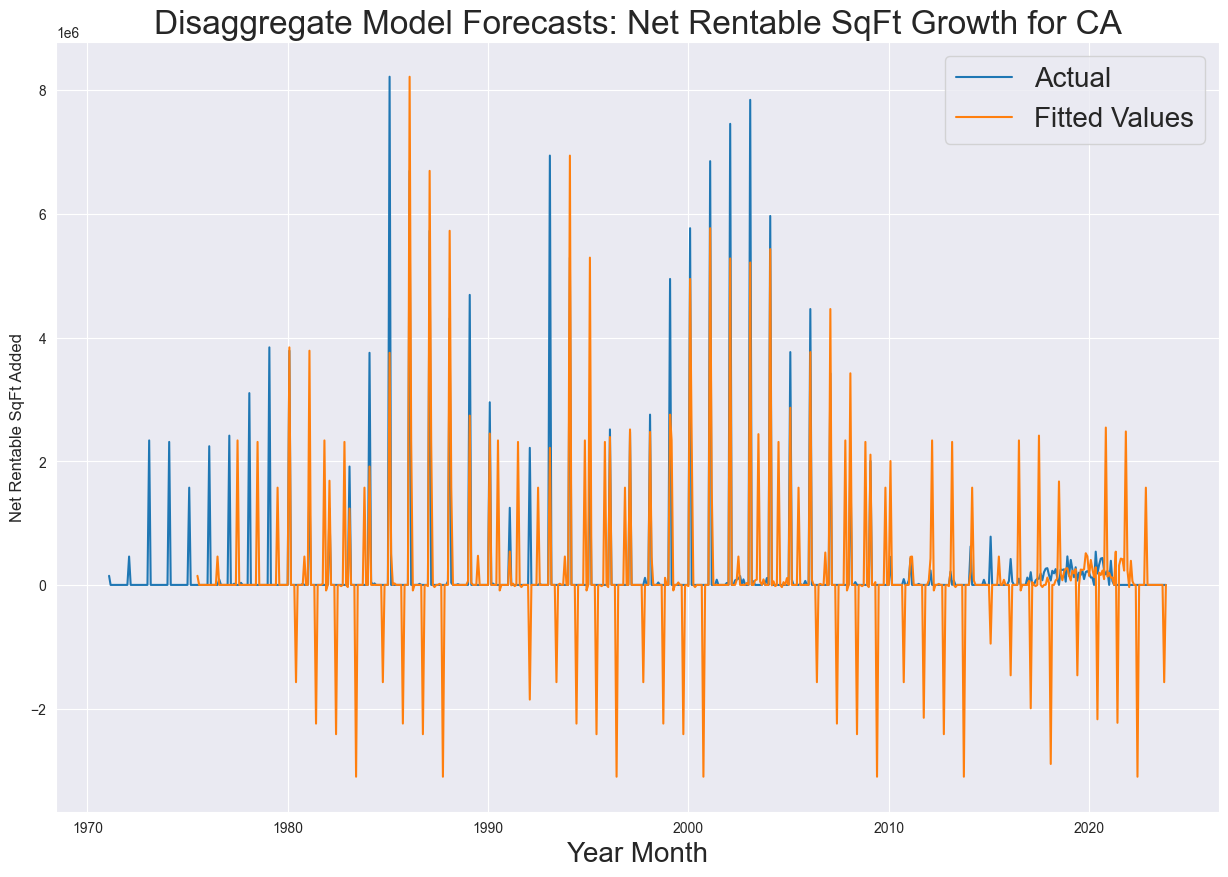

In [14]:
# Disaggregate Model
plt.figure(figsize=(15, 10))
plt.plot(rentable_sqft_added_ts.index, rentable_sqft_added_ts.values, linestyle='-', label="Actual")
model_fitted_values = inverse_method(results.fittedvalues)
plt.plot(model_fitted_values.index, model_fitted_values.values, linestyle='-', label="Fitted Values")

plt.grid(True)
plt.xlabel('Year Month', fontsize=20)
plt.ylabel('Net Rentable SqFt Added', fontsize=12)
plt.title(f'Disaggregate Model Forecasts: Net Rentable SqFt Growth for {state}', fontsize=24)
plt.legend(fontsize=20)

plt.show()

Aggregate Model RMSE
1999972.6110115468


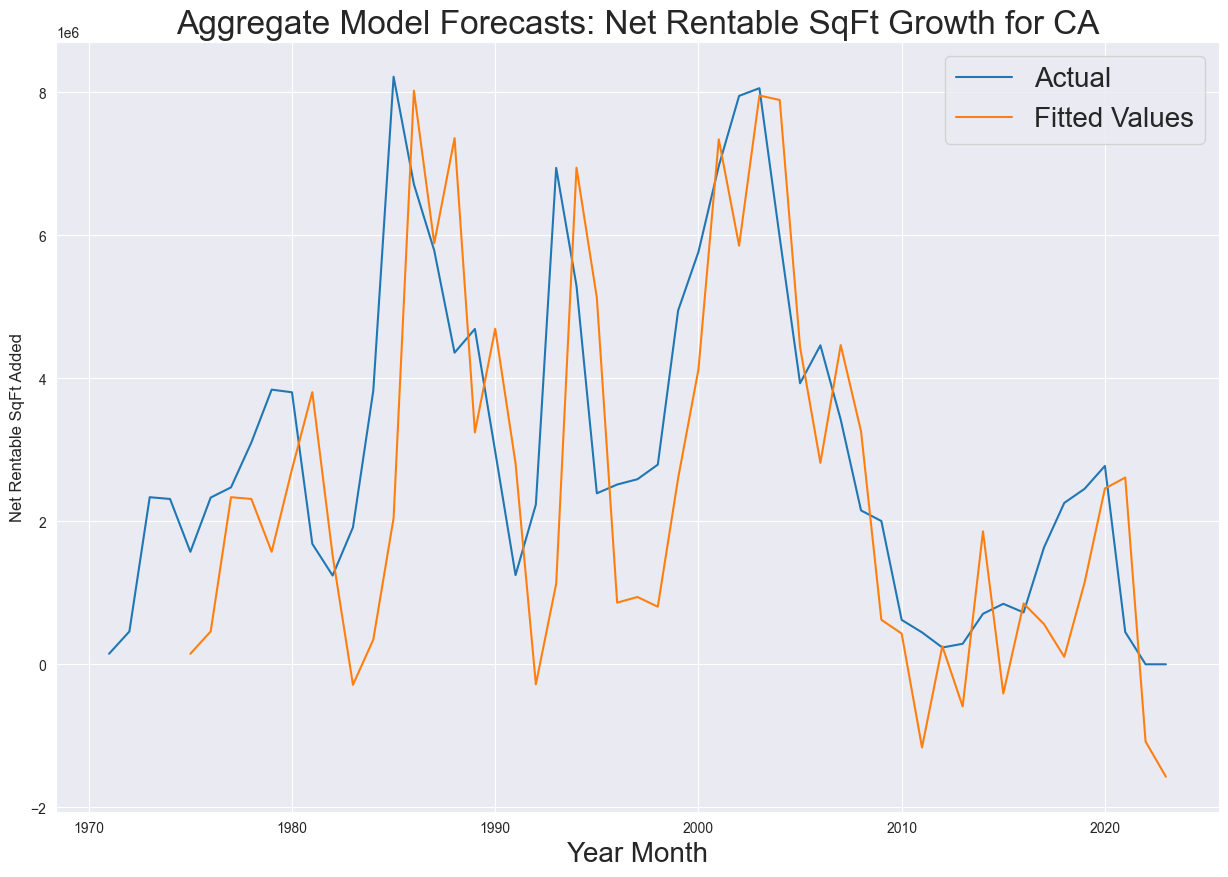

In [15]:
# Aggregate Model
plt.figure(figsize=(15, 10))
data = rentable_sqft_added_ts.reset_index()
data["Year"] = data["year_month"].dt.year
data = data[["Year", "NetRentableSqFt"]].groupby("Year").sum()
plt.plot(data.index, data.values, linestyle='-', label="Actual")

model_fitted_values = inverse_method(results.fittedvalues)
fitted = model_fitted_values.reset_index()
fitted.columns = ["year_month", "fitted_values"]
fitted["Year"] = fitted["year_month"].dt.year
fitted = fitted[["Year", "fitted_values"]].groupby("Year").sum()
plt.plot(fitted.index, fitted.values, linestyle='-', label="Fitted Values")

plt.grid(True)
plt.xlabel('Year Month', fontsize=20)
plt.ylabel('Net Rentable SqFt Added', fontsize=12)
plt.title(f'Aggregate Model Forecasts: Net Rentable SqFt Growth for {state}', fontsize=24)
plt.legend(fontsize=20)

print("Aggregate Model RMSE")
rmse = np.sqrt(mean_squared_error(data.loc[fitted.index.min():fitted.index.max(), "NetRentableSqFt"], fitted["fitted_values"]))
print(rmse)
plt.show()

### A High RMSE (1999972.6 in this case) can mean missed opportunity or excessive construction of Rental spaces

### Now let's see what this model suggests that we should do in the next 1 year

In [16]:
one_year_agg_forecast = results.forecast(12).sum()
if one_year_agg_forecast >= 0:
    print(f"In the next one year: Increase Rental sqft by: {round(one_year_agg_forecast, 2)} sqft in {state}")
else:
    print(f"In the next one year: Decrease Rental sqft by: {round(abs(one_year_agg_forecast), 2)} sqft in {state}")

In the next one year: Decrease Rental sqft by: 199696.91 sqft in CA
